<a href="https://colab.research.google.com/github/vishoov/handwrittenrecog/blob/main/final_CNN_complete%2C_trained_using_given_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from PIL import Image
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

In [ ]:
def load_images_to_data(image_label, image_directory, features_data, label_data):
    list_of_files = os.listdir(image_directory)
    for file in list_of_files:
        image_file_name = os.path.join(image_directory, file)
        if ".png" in image_file_name:
            img = Image.open(image_file_name).convert("L")
            img = np.resize(img, (28,28,1))
            im2arr = np.array(img)
            im2arr = im2arr.reshape(1,28,28,1)
            features_data = np.append(features_data, im2arr, axis=0)
            label_data = np.append(label_data, [image_label], axis=0)
    return features_data, label_data

In [ ]:
X_train, y_train = load_images_to_data('1', '/content/drive/MyDrive/trainPart1/train', X_train, y_train)
X_test, y_test = load_images_to_data('1', '/content/drive/MyDrive/trainPart1/train', X_test, y_test)

In [ ]:
X_train/=255
X_test/=255

In [ ]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=7, batch_size=10, validation_split=0.1, verbose=1)

Epoch 1/7
5400/5400 [==============================] - 63s 12ms/step - loss: 0.2556 - accuracy: 0.9205 - val_loss: 0.0451 - val_accuracy: 0.9860
Epoch 2/7
5400/5400 [==============================] - 63s 12ms/step - loss: 0.1142 - accuracy: 0.9657 - val_loss: 0.0356 - val_accuracy: 0.9890
Epoch 3/7
5400/5400 [==============================] - 62s 11ms/step - loss: 0.0959 - accuracy: 0.9714 - val_loss: 0.0429 - val_accuracy: 0.9870
Epoch 4/7
5400/5400 [==============================] - 62s 12ms/step - loss: 0.0867 - accuracy: 0.9735 - val_loss: 0.0297 - val_accuracy: 0.9918
Epoch 5/7
5400/5400 [==============================] - 60s 11ms/step - loss: 0.0813 - accuracy: 0.9760 - val_loss: 0.0326 - val_accuracy: 0.9908
Epoch 6/7
5400/5400 [==============================] - 61s 11ms/step - loss: 0.0767 - accuracy: 0.9774 - val_loss: 0.0316 - val_accuracy: 0.9903
Epoch 7/7
5400/5400 [==============================] - 61s 11ms/step - loss: 0.0764 - accuracy: 0.9774 - val_loss: 0.0362 - val_ac

In [ ]:
model.save('models/mnistCNN.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [ ]:
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.02653471753001213, 0.9911999702453613]


0


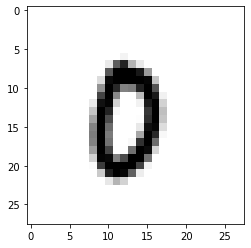

In [ ]:
from PIL import Image
my_image = "img001-002.png" 
fname = "/content/drive/MyDrive/trainPart1/train/Sample001/" + my_image
image = np.array(Image.open(fname).resize((28, 28)))
plt.imshow(image)
image = image / 255
image = image[:,:,0]
image = image.reshape((1,28,28,1))
y_pred = model.predict(image)
score= tf.nn.softmax(y_pred)
print(np.argmax(score))